In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns


In [2]:
data = yf.download(tickers='ETH-USD', start='2017-03-11', end='', interval='1d')
data.drop(columns=['Volume'], inplace=True)
data.reset_index(inplace=True)
data = data[['Date', 'Open', 'High', 'Low', 'Close']]
data['Close_Adj']= data['Close'].shift(-1)
data.tail()

C:\Users\leona\AppData\Local\Temp\ipykernel_6652\3963500161.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers='ETH-USD', start='2017-03-11', end='', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Close_Adj
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,
2793,2025-07-03,2570.796631,2635.192139,2558.582520,2591.007324,2508.518311
2794,2025-07-04,2590.845703,2601.119629,2475.754883,2508.518311,2517.280029
2795,2025-07-05,2508.095947,2529.842285,2489.002441,2517.280029,2571.236572
2796,2025-07-06,2517.280029,2603.064697,2505.370850,2571.236572,2526.618896
2797,2025-07-07,2571.060303,2586.621094,2519.411865,2526.618896,NaN


C:\Users\leona\AppData\Local\Temp\ipykernel_6652\2166485154.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


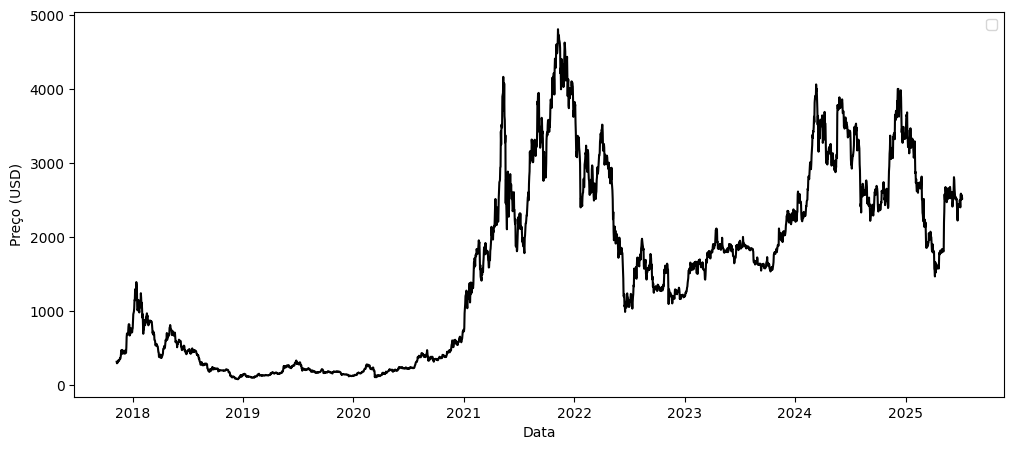

In [25]:
plt.figure(figsize=(12,5))
plt.plot(data["Date"],data['Close'],color="black")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
numeric_data = data.drop(columns=['Date'])
data_prepared = sc.fit_transform(numeric_data)
print(data_prepared.shape)


(2798, 5)


C:\Users\leona\AppData\Local\Temp\ipykernel_6652\3119771332.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  numeric_data = data.drop(columns=['Date'])


In [32]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 50

print(data_prepared.shape[0])
for j in range(5):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_prepared.shape[0]):#backcandles+2
        X[j].append(data_prepared[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_prepared[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2798
[[[0.04747676 0.05078878 0.04837454 0.0500395  0.0454642 ]
  [0.05002152 0.04980383 0.04567477 0.0454642  0.04872747]
  [0.04534823 0.04870841 0.04646222 0.04872747 0.04729487]
  ...
  [0.14369874 0.14594141 0.14629439 0.14584601 0.1435206 ]
  [0.14615335 0.14645386 0.1414355  0.1435206  0.13805948]
  [0.14345286 0.14105809 0.13340436 0.13805948 0.14156408]]

 [[0.05002152 0.04980383 0.04567477 0.0454642  0.04872747]
  [0.04534823 0.04870841 0.04646222 0.04872747 0.04729487]
  [0.04875592 0.048646   0.04653147 0.04729487 0.0491579 ]
  ...
  [0.14615335 0.14645386 0.1414355  0.1435206  0.13805948]
  [0.14345286 0.14105809 0.13340436 0.13805948 0.14156408]
  [0.13883585 0.14247247 0.1395359  0.14156408 0.13387866]]

 [[0.04534823 0.04870841 0.04646222 0.04872747 0.04729487]
  [0.04875592 0.048646   0.04653147 0.04729487 0.0491579 ]
  [0.04713397 0.05057303 0.04836785 0.0491579  0.05358176]
  ...
  [0.14345286 0.14105809 0.13340436 0.13805948 0.14156408]
  [0.13883585 0.14247247 0.13

In [33]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2198
(2198, 50, 5)
(550, 50, 5)
(2198, 1)
(550, 1)
[[0.13387866]
 [0.14222845]
 [0.14559324]
 ...
 [0.44977856]
 [0.46210488]
 [0.4620222 ]]
2198
(2198, 50, 5)
(550, 50, 5)
(2198, 1)
(550, 1)
[[0.13387866]
 [0.14222845]
 [0.14559324]
 ...
 [0.44977856]
 [0.46210488]
 [0.4620222 ]]


In [34]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 5), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0138 - val_loss: 2.4122e-04
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0011 - val_loss: 3.7510e-04
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.8354e-04 - val_loss: 1.8951e-04
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.2648e-04 - val_loss: 3.1467e-04
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 6.7940e-04 - val_loss: 5.9229e-04
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 6.8196e-04 - val_loss: 7.5751e-04
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.5450e-04 - val_loss: 1.6092e-04
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.4644e-04 - val_loss: 2.2170e-04
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.5670e-04 - val_loss: 1.4349e-04
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.4982e-04 - val_loss: 1.2336e-04
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - l

In [35]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[0.45802525] [0.45630653]
[0.4542242] [0.45233875]
[0.45026416] [0.47564075]
[0.46825662] [0.47813546]
[0.47487333] [0.52832316]
[0.5154135] [0.53625831]
[0.53422254] [0.51613069]
[0.51969105] [0.52715864]
[0.52330846] [0.50508555]
[0.50572747] [0.51336059]


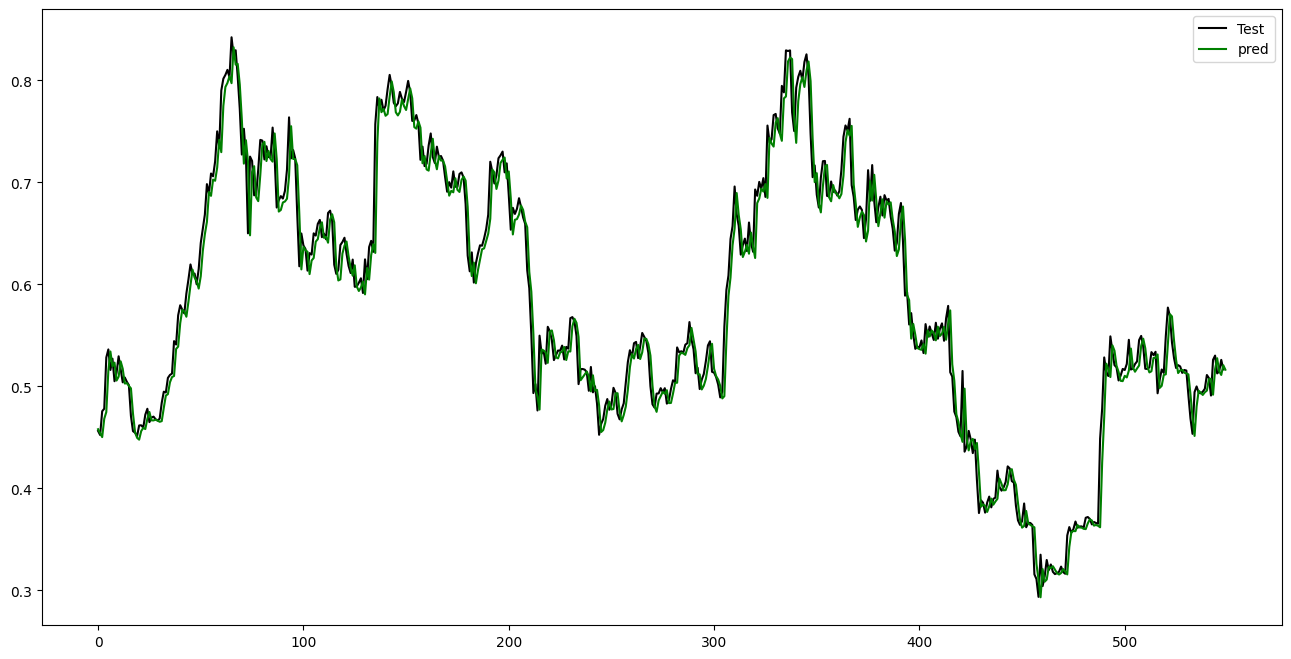

In [36]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()